In [54]:
### 2023-05-09 at Bond



import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
# loaded_model_path = '../saved_model/2023-05-09Einstein_Radius_pretrainViT.mdl'
loaded_model_path = '../saved_model/2023-05-23Einstein_RadiusResNet101.mdl'
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/media/joshua/Milano/Milano_git_work_zone/simsiam_vit_lensing/notebook


In [55]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/Einstein_area_train.csv')
            self.df = self.df.head(100)

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/Einstein_area_val.csv')
            self.df = self.df.head(200)

    def __getitem__(self, index):

        #print(self.df['ID'])
        ID = self.df['ID'].iloc[[index]]
        score = self.df['score'].iloc[[index]]
        #n_sources = self.df['n_sources'].iloc[[index]]
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y']#, 'EUC_VIS']
        ein_area = self.df['ein_area'].iloc[[index]]  ### square rad
        Einstein_Radius = (180/np.pi) * 3600. * (ein_area**0.5) # in arcsec
        #print("Einstein_Radius", Einstein_Radius.values[0])
        #print("mag_eff", mag_eff.values[0])

        #if
        #Einstein_Radius = 1
        # filepath = "/media/joshua/HDD_fun2/Public/EUC_Y/imageEUC_Y-" + str(ID.values[0]) + ".fits"
        # lens_data = fits.open(filepath)
        # img = lens_data[0].data
        image = np.zeros((3, 224, 224))
        rotation_seed = np.random.randint(low=0, high = 4)
        #print("rotation_seed", rotation_seed)
        try:
            for i, channel in enumerate(channel_names):

                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img *= 10e8
#                 img = np.rot90(img, rotation_seed)
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
        except:
            print("error", ID)
            pass



        # if self.transform is not None:
        #     #image = image.astype(np.uint8)
        #     print(image.dtype)
        #     image = Image.fromarray(image)
        #     #test_data = data_transforms['test'](transforms.ToPILImage()(test_data))
        #     image = self.transform(image)

        return image, ID.values[0], score.values[0], Einstein_Radius.values[0]#n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]

In [56]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

Einstein_radius (ground truth) 2.6389647
Einstein_radius prediction: 2.9287987
score tensor([0.9927], dtype=torch.float64)


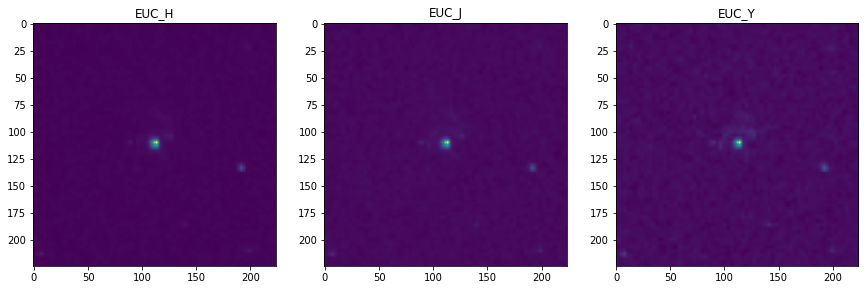

______
Einstein_radius (ground truth) 5.9299355
Einstein_radius prediction: 5.3305826
score tensor([0.8390], dtype=torch.float64)


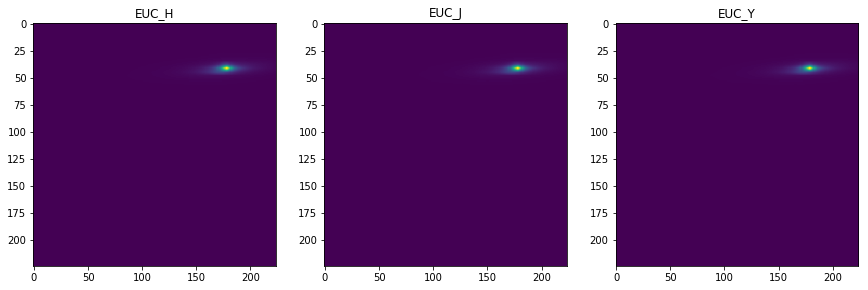

______
Einstein_radius (ground truth) 3.9020536
Einstein_radius prediction: 3.2514048
score tensor([0.8773], dtype=torch.float64)


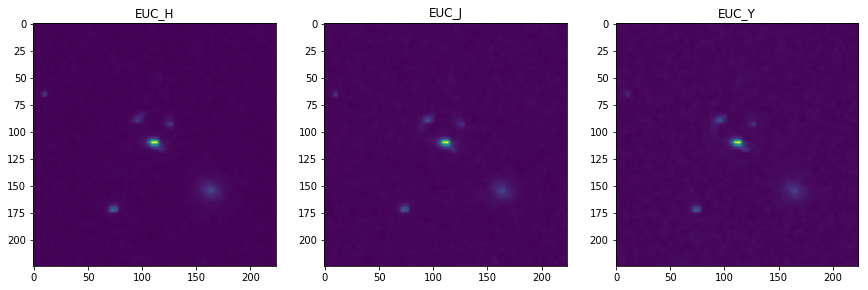

______
Einstein_radius (ground truth) 5.3829265
Einstein_radius prediction: 4.5031424
score tensor([0.9930], dtype=torch.float64)


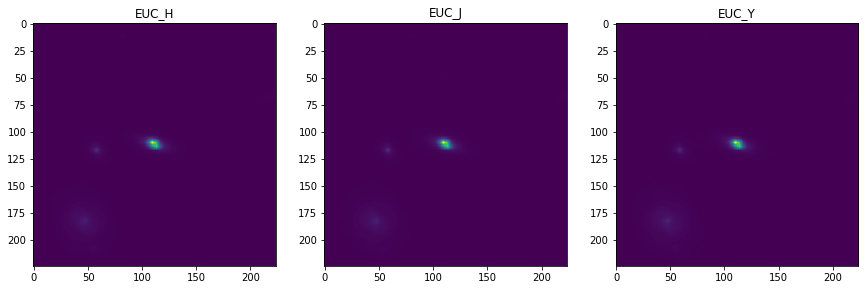

______
Einstein_radius (ground truth) 6.587182
Einstein_radius prediction: 3.9960337
score tensor([0.9657], dtype=torch.float64)


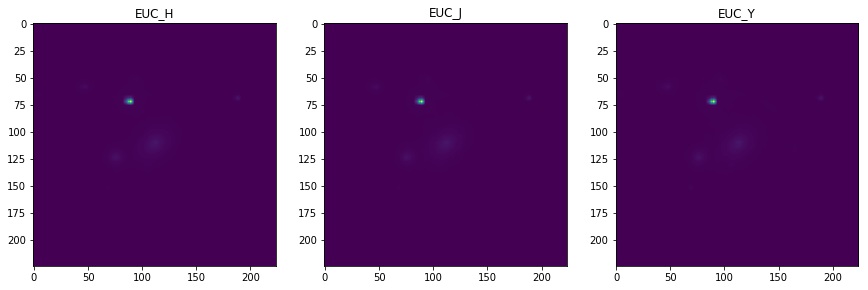

______
Einstein_radius (ground truth) 2.6812282
Einstein_radius prediction: 2.8999205
score tensor([0.9968], dtype=torch.float64)


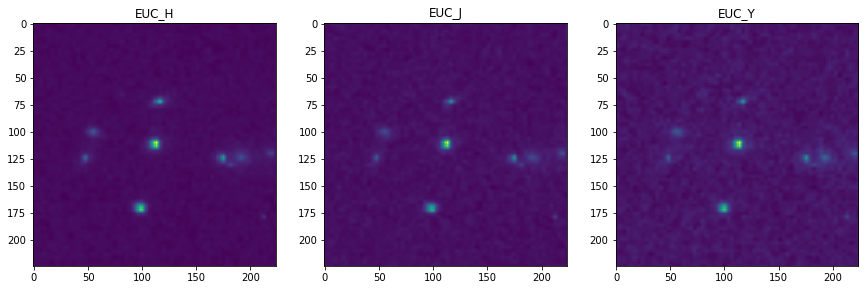

______
Einstein_radius (ground truth) 2.3933473
Einstein_radius prediction: 2.836954
score tensor([0.8490], dtype=torch.float64)


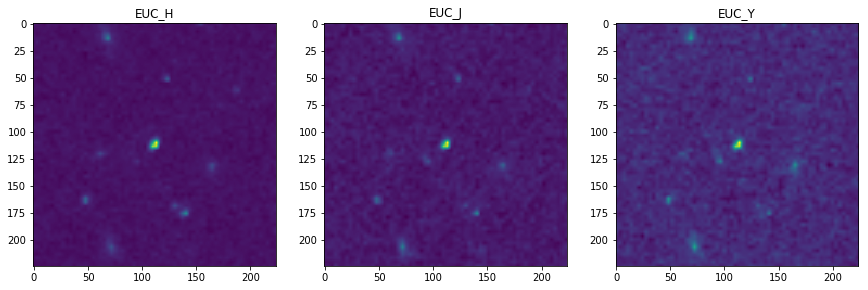

______
Einstein_radius (ground truth) 2.5238755
Einstein_radius prediction: 2.8317766
score tensor([0.9896], dtype=torch.float64)


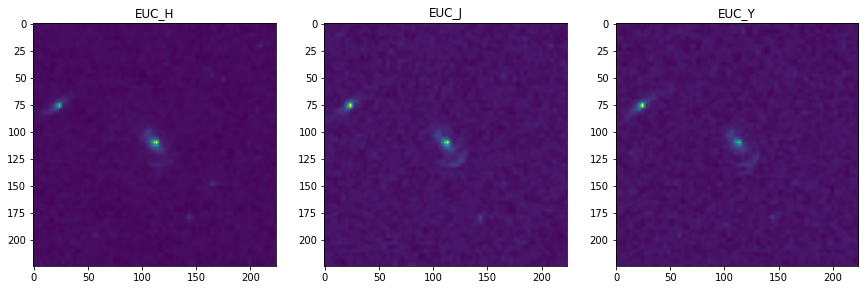

______
Einstein_radius (ground truth) 2.1226943
Einstein_radius prediction: 2.9788013
score tensor([0.9715], dtype=torch.float64)


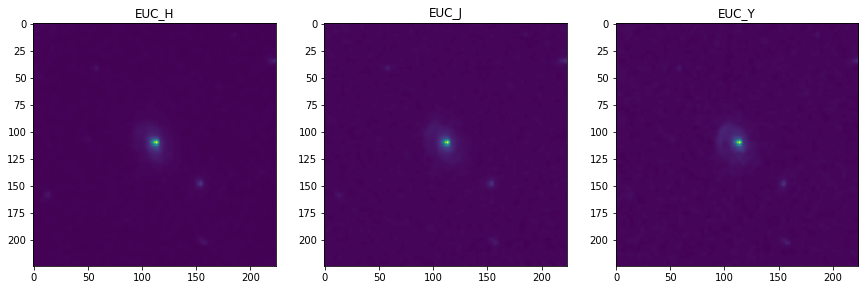

______
Einstein_radius (ground truth) 4.4218864
Einstein_radius prediction: 4.1704946
score tensor([0.8746], dtype=torch.float64)


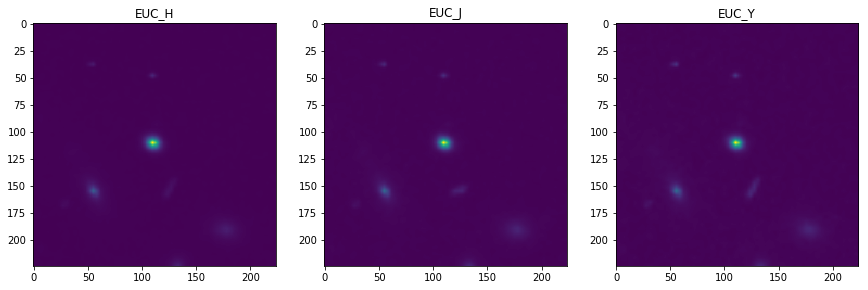

______
Einstein_radius (ground truth) 5.6914325
Einstein_radius prediction: 3.9731529
score tensor([0.8956], dtype=torch.float64)


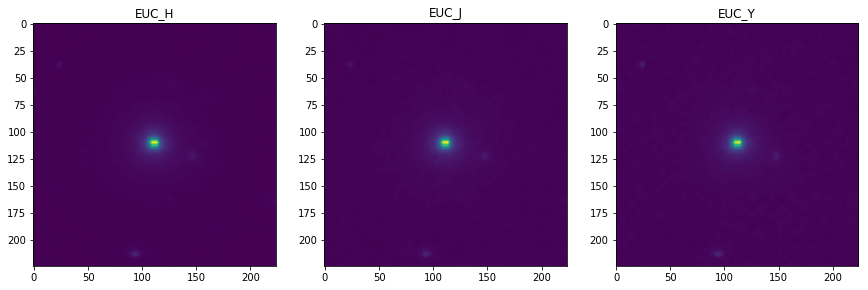

______
Einstein_radius (ground truth) 4.2468514
Einstein_radius prediction: 3.2002358
score tensor([0.9685], dtype=torch.float64)


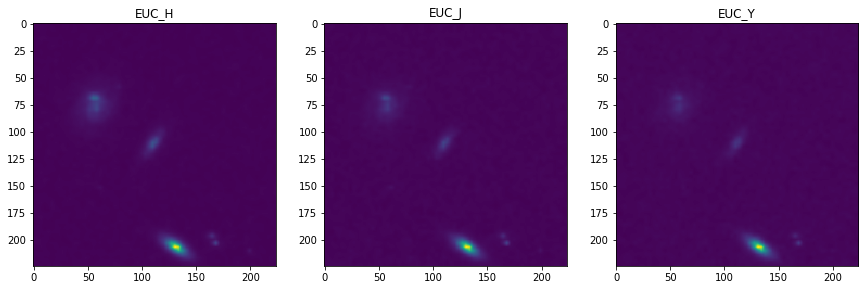

______
Einstein_radius (ground truth) 4.5925684
Einstein_radius prediction: 3.4668057
score tensor([0.9873], dtype=torch.float64)


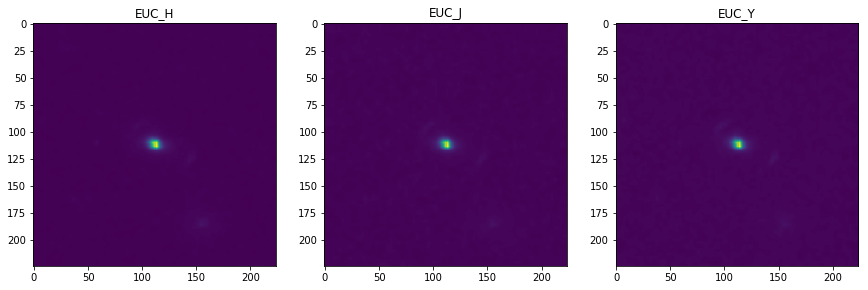

______
Einstein_radius (ground truth) 3.8104987
Einstein_radius prediction: 2.9429116
score tensor([0.9740], dtype=torch.float64)


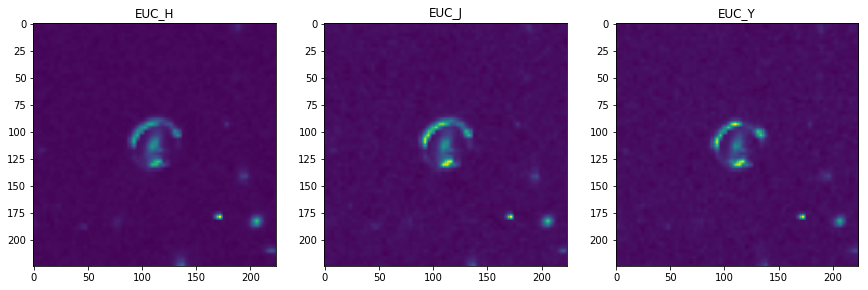

______
Einstein_radius (ground truth) 5.367607
Einstein_radius prediction: 4.025508
score tensor([0.8325], dtype=torch.float64)


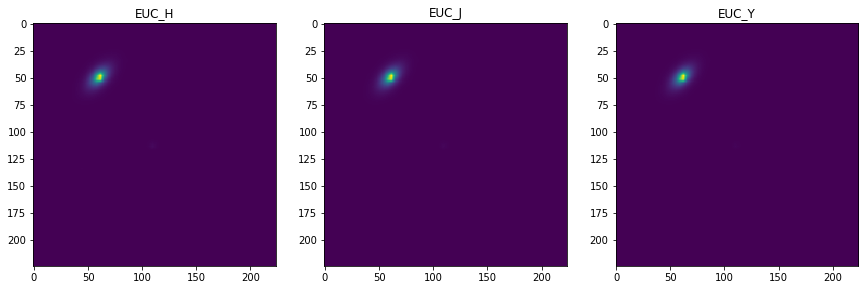

______
Einstein_radius (ground truth) 5.662294
Einstein_radius prediction: 3.21614
score tensor([0.8980], dtype=torch.float64)


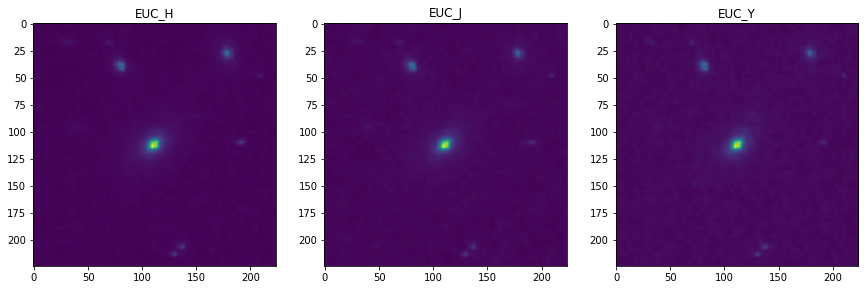

______
Einstein_radius (ground truth) 3.1759622
Einstein_radius prediction: 2.9139986
score tensor([0.9361], dtype=torch.float64)


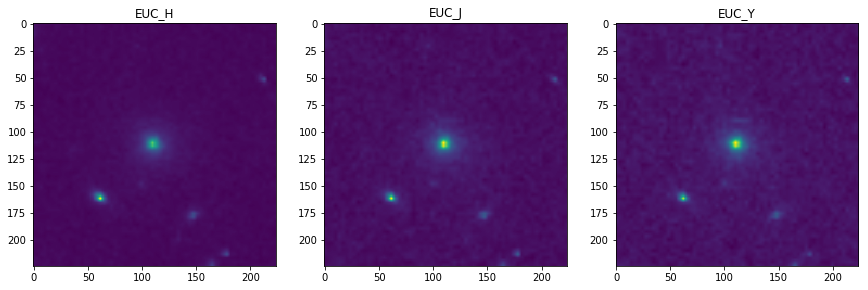

______
Einstein_radius (ground truth) 4.4359546
Einstein_radius prediction: 3.1551323
score tensor([0.9224], dtype=torch.float64)


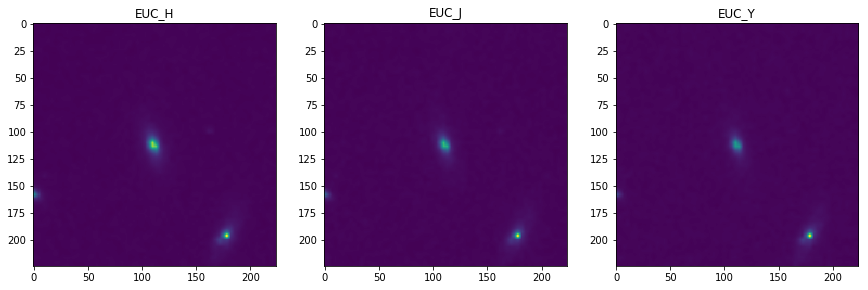

______
Einstein_radius (ground truth) 4.0736647
Einstein_radius prediction: 3.592605
score tensor([0.8828], dtype=torch.float64)


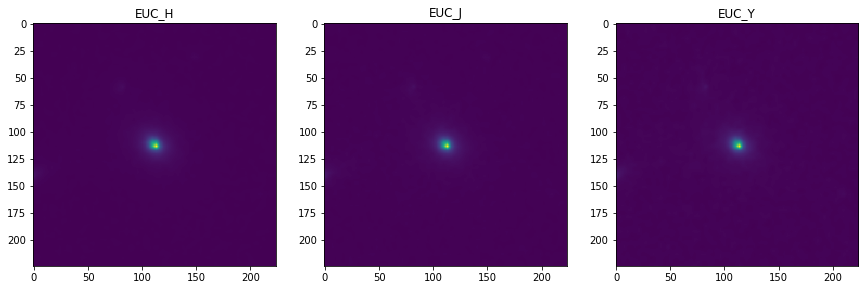

______
Einstein_radius (ground truth) 4.465359
Einstein_radius prediction: 3.5328417
score tensor([0.8786], dtype=torch.float64)


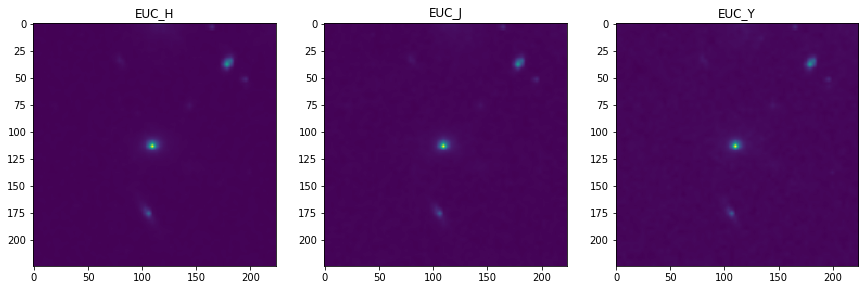

______
Einstein_radius (ground truth) 2.1300275
Einstein_radius prediction: 2.8622026
score tensor([0.9075], dtype=torch.float64)


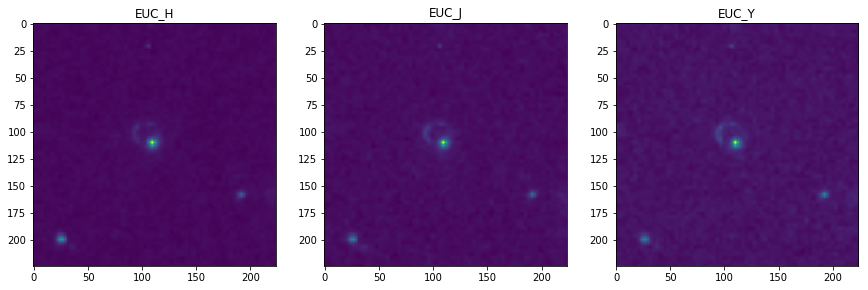

______
Einstein_radius (ground truth) 5.5840573
Einstein_radius prediction: 3.7029715
score tensor([0.9709], dtype=torch.float64)


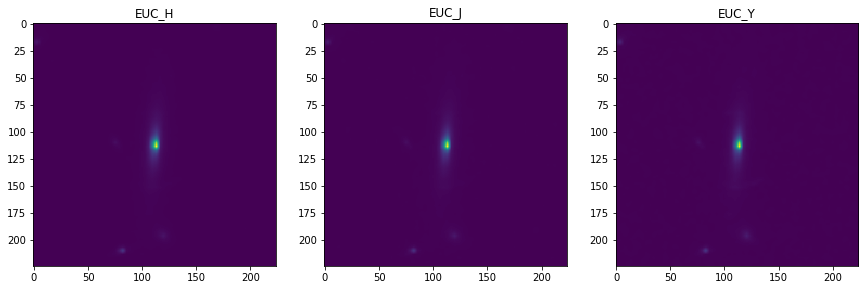

______
Einstein_radius (ground truth) 2.5294912
Einstein_radius prediction: 3.2874298
score tensor([0.9590], dtype=torch.float64)


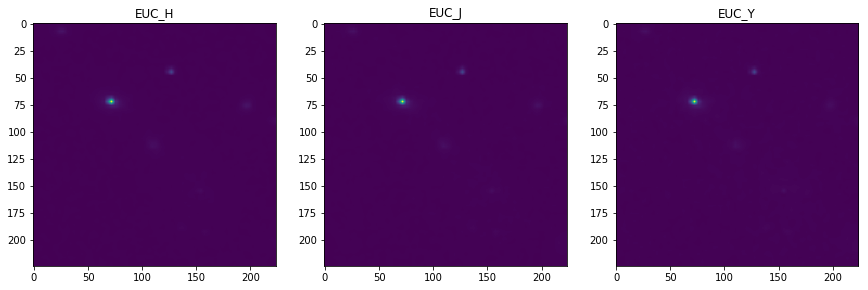

______
Einstein_radius (ground truth) 4.4908166
Einstein_radius prediction: 3.8688905
score tensor([0.8866], dtype=torch.float64)


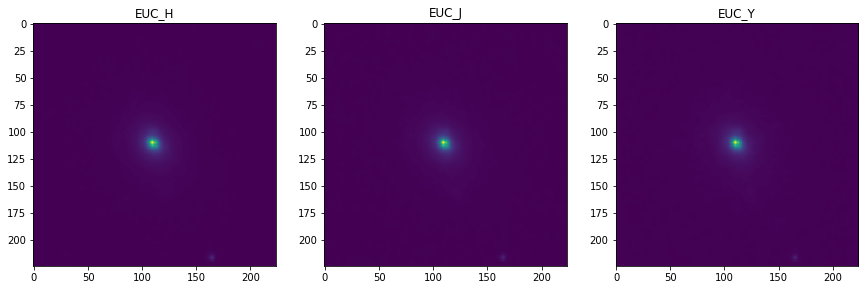

______
Einstein_radius (ground truth) 5.3923397
Einstein_radius prediction: 3.288136
score tensor([0.8972], dtype=torch.float64)


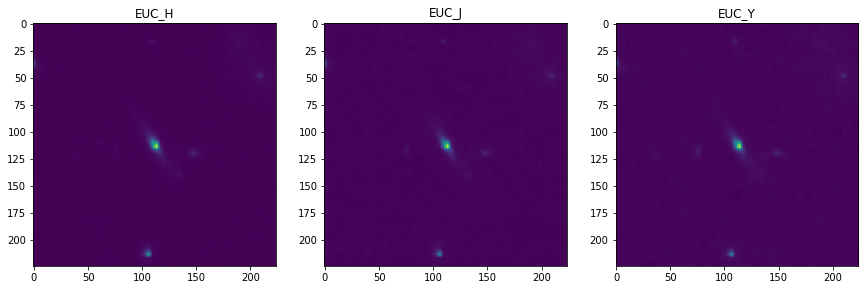

______
Einstein_radius (ground truth) 5.1103992
Einstein_radius prediction: 3.73568
score tensor([0.9802], dtype=torch.float64)


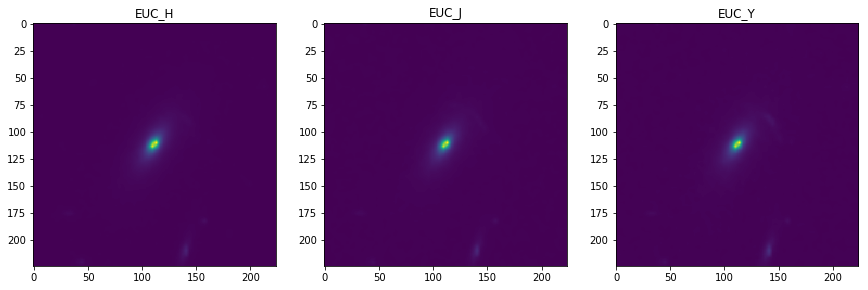

______
Einstein_radius (ground truth) 5.2172275
Einstein_radius prediction: 4.4866004
score tensor([0.9095], dtype=torch.float64)


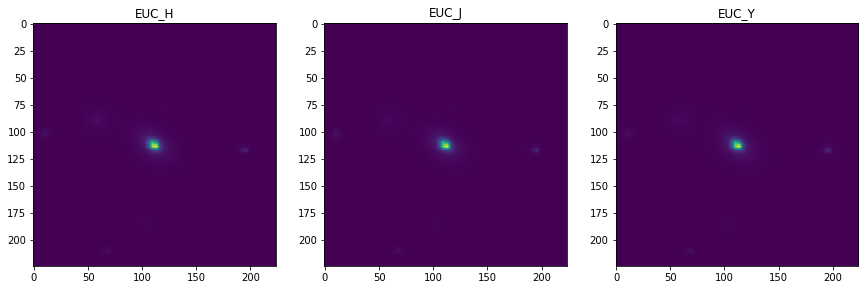

______
Einstein_radius (ground truth) 5.500642
Einstein_radius prediction: 3.0180118
score tensor([0.9992], dtype=torch.float64)


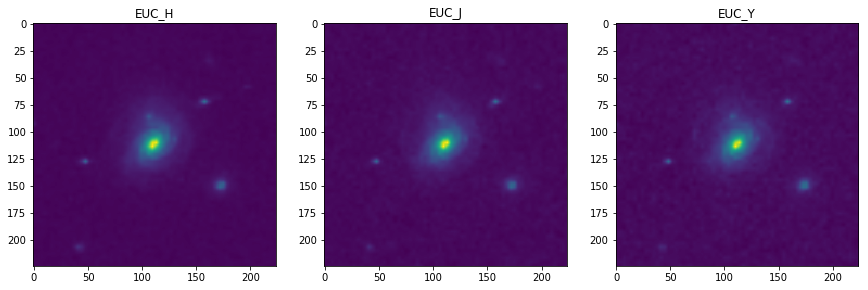

______
Einstein_radius (ground truth) 3.0038345
Einstein_radius prediction: 3.2513523
score tensor([0.8991], dtype=torch.float64)


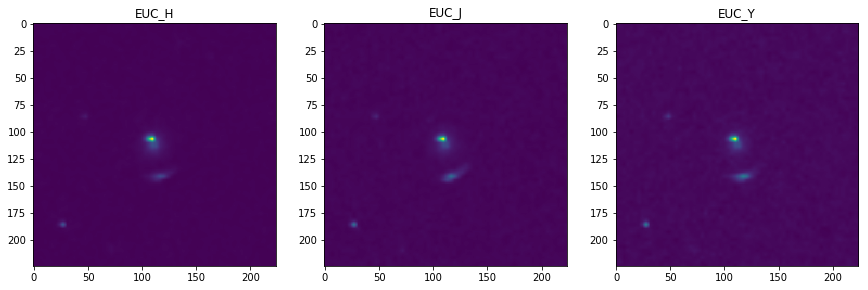

______
Einstein_radius (ground truth) 2.5957425
Einstein_radius prediction: 2.8814676
score tensor([0.9938], dtype=torch.float64)


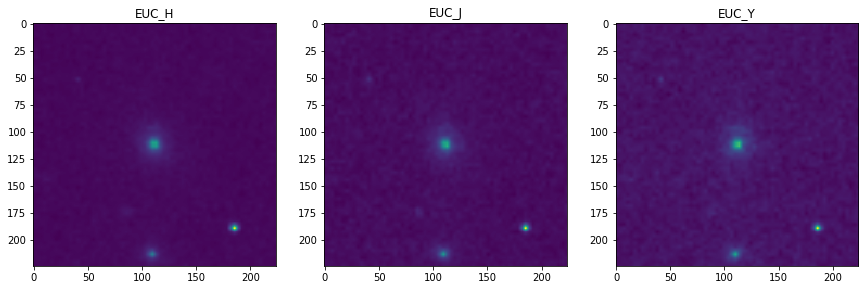

______
Einstein_radius (ground truth) 3.6452541
Einstein_radius prediction: 3.4351597
score tensor([0.9479], dtype=torch.float64)


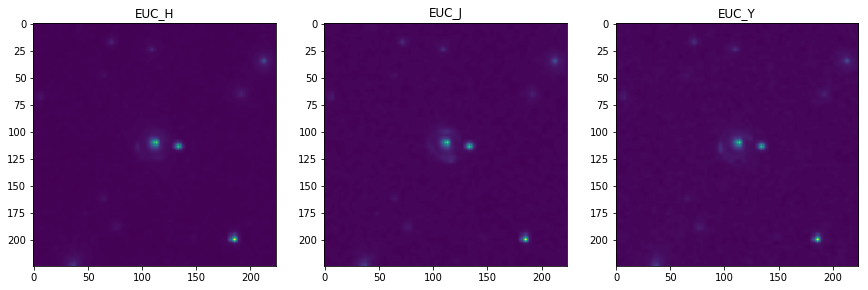

______
Einstein_radius (ground truth) 3.8766537
Einstein_radius prediction: 3.7159748
score tensor([0.9338], dtype=torch.float64)


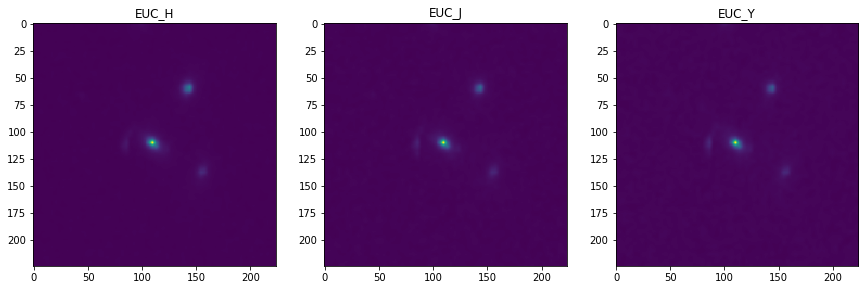

______


In [58]:
net.cuda()




for batch_idx, (data, ID, score, Einstein_radius) in enumerate(test_loader):
    data, target = data.float(), Einstein_radius.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
#     output = output.logits
    #output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] > 1.00:
    #if mag_eff[0] > 4.8:    
        print("Einstein_radius (ground truth)", target.cpu().numpy()[0][0])
        print("Einstein_radius prediction:", output.data.cpu().numpy()[0][0])
        print("score", score)
        
        image = np.zeros((3, 224, 224))
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y'] #, 'EUC_VIS']
        plt.figure(figsize=(20, 5))
        for i, channel in enumerate(channel_names):
            filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
            lens_data = fits.open(filepath)
            img = lens_data[0].data
            img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
            image[i, :, :] += img_channel_0
            plt.subplot(1, 4, i+ 1)
            plt.imshow(image[i, :, :])
            plt.title(channel)
        plt.show()
    print("______")

    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 30:
        break

In [59]:
net.cuda()


Einstein_radius_target_list = []
Einstein_radius_output_list = []
score_list = []

for batch_idx, (data, ID, score, Einstein_radius) in enumerate(test_loader):
    data, target = data.float(), Einstein_radius.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
#     output = output.logits
    #output = F.sigmoid(output)
    Einstein_radius_target_list.append(target.cpu().numpy()[0][0])
    Einstein_radius_output_list.append(output.data.cpu().numpy()[0][0])
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if score.cpu().numpy()[0] >= 0.95:
    #if mag_eff[0] > 4.8:    
#         print("Einstein_radius (ground truth)", target.cpu().numpy()[0][0])
#         print("Einstein_radius prediction:", output.data.cpu().numpy()[0][0])
#         print("score", score)
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
   
    #if mag_eff[0] > 4.8:    
        #print("criteria (ground truth)", target.cpu().numpy()[0][0])
        #print("criteria prediction:", output.data.cpu().numpy()[0][0])
        Einstein_radius_target_list.append(target.cpu().numpy()[0][0])
        Einstein_radius_output_list.append(output.data.cpu().numpy()[0][0])
        score_list.append(score.cpu().numpy()[0])
        

    #print("______")

    
    
    
#     if batch_idx > 300:
#         break

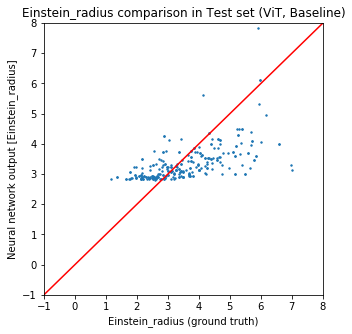

In [67]:
scale= np.linspace(-1, 8 ,100)
plt.figure(figsize=(5, 5))        
plt.scatter(Einstein_radius_target_list, Einstein_radius_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("Einstein_radius comparison in Test set (ViT, Baseline)")
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.xlabel("Einstein_radius (ground truth)")
plt.ylabel("Neural network output [Einstein_radius]")
plt.savefig("./" + "scatter_plot.png")
plt.show()


In [68]:
diff = np.array(Einstein_radius_output_list) - np.array(Einstein_radius_target_list)
diff = np.array(diff)
diff.std()

1.143955

In [69]:
from sklearn.metrics import r2_score

r2_score = r2_score(Einstein_radius_target_list, Einstein_radius_output_list)

In [70]:
r2_score

0.3598862758903416